# Задача детекции: Определение знаков ПДД

Обоснование выбора набора данных:
1. Практическая значимость: Распознавание дорожных знаков - важная задача для систем помощи водителю и автономного вождения
2. Разнообразие классов: Датасет содержит различные типы дорожных знаков с разными формами, цветами и символами
3. Вариативность условий: Изображения получены в различных условиях освещения, погоды и с разных ракурсов
4. Наличие аннотаций: Для каждого знака предоставлены координаты ограничивающих рамок и класс знака
5. Реалистичность: Изображения получены из реальных дорожных сцен, что делает модель применимой на практике

Обоснование выбора метрик качества для детекции объектов:
1. mAP (mean Average Precision) - основная метрика для задач детекции, учитывающая как точность локализации, так и классификации
2. IoU (Intersection over Union) - метрика для оценки точности локализации объекта
3. Precision - доля правильных детекций среди всех предсказанных, важна для минимизации ложных срабатываний
4. Recall - доля обнаруженных объектов от общего числа, важна для обеспечения полноты детекции
5. F1-score - гармоническое среднее между precision и recall

Для задачи распознавания дорожных знаков особенно важны:
- Высокий recall, чтобы не пропустить критически важные знаки (например, "Стоп" или "Уступи дорогу")
- Высокая precision, чтобы избежать ложных срабатываний, которые могут привести к неправильным решениям
- Точная локализация (высокий IoU), особенно в сложных сценах с несколькими знаками


## Загрузка датасета и необходимы функции и классы

In [4]:
mkdir -p ~/.kaggle

In [6]:
cp api.json ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download pkdarabi/cardetection

Dataset URL: https://www.kaggle.com/datasets/pkdarabi/cardetection
License(s): Attribution 4.0 International (CC BY 4.0)


# 1. Baseline YOLO

In [12]:
from tqdm import tqdm
from ultralytics import YOLO
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import cv2
import yaml
import numpy as np
from torch.utils.data import Dataset
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from torch.nn import functional as F
import time
import random
import matplotlib.patches as patches
from matplotlib.colors import to_rgba

In [32]:
model = YOLO('yolov8n.pt')

results = model.train(
    data="/kaggle/working/cardetection/car/data.yaml",
    epochs=10,
    imgsz=640,
    batch=16,
    name='yolov8_car_detection'
)

Ultralytics 8.3.129 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/cardetection/car/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_car_detection6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspect

train: Scanning /kaggle/working/cardetection/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:02<00:00, 1424.33it/s]

train: New cache created: /kaggle/working/cardetection/car/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 332.2±210.5 MB/s, size: 20.7 KB)


val: Scanning /kaggle/working/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 673.48it/s]


val: New cache created: /kaggle/working/cardetection/car/valid/labels.cache
Plotting labels to runs/detect/yolov8_car_detection6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/yolov8_car_detection6
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.22G     0.8599      4.068      1.213         15        640: 100%|██████████| 221/221 [00:44<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.74it/s]


                   all        801        944      0.238      0.439      0.318      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.48G     0.7562      2.982      1.073         14        640: 100%|██████████| 221/221 [00:40<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.81it/s]


                   all        801        944      0.476      0.567      0.515      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.48G     0.7422      2.351      1.054         12        640: 100%|██████████| 221/221 [00:40<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.85it/s]

                   all        801        944      0.674       0.57      0.658      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.48G     0.7123      1.837      1.039         12        640: 100%|██████████| 221/221 [00:40<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.93it/s]

                   all        801        944       0.72      0.723      0.773      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.48G     0.6643      1.401      1.011         11        640: 100%|██████████| 221/221 [00:40<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.75it/s]

                   all        801        944      0.889      0.668      0.817      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.48G     0.6488      1.178     0.9918         12        640: 100%|██████████| 221/221 [00:40<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.05it/s]

                   all        801        944      0.867      0.796       0.88      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.48G     0.6219      1.014     0.9784         14        640: 100%|██████████| 221/221 [00:40<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.11it/s]


                   all        801        944      0.886      0.806      0.892      0.757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.48G      0.598     0.9102     0.9636         10        640: 100%|██████████| 221/221 [00:40<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.06it/s]


                   all        801        944       0.94      0.818      0.911       0.77

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.48G     0.5777     0.8079     0.9491         17        640: 100%|██████████| 221/221 [00:40<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.23it/s]

                   all        801        944      0.934      0.847       0.92      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.48G     0.5578     0.7593     0.9354         10        640: 100%|██████████| 221/221 [00:40<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.90it/s]


                   all        801        944      0.928      0.855      0.926      0.797

10 epochs completed in 0.126 hours.
Optimizer stripped from runs/detect/yolov8_car_detection6/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8_car_detection6/weights/best.pt, 6.2MB

Validating runs/detect/yolov8_car_detection6/weights/best.pt...
Ultralytics 8.3.129 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.78it/s]


                   all        801        944      0.927      0.855      0.926      0.797
           Green Light         87        122      0.818      0.705      0.773      0.463
             Red Light         74        108      0.828      0.741      0.778      0.451
       Speed Limit 100         52         52      0.816      0.942      0.955      0.874
       Speed Limit 110         17         17      0.939      0.902      0.983      0.902
       Speed Limit 120         60         60          1      0.882      0.976      0.885
        Speed Limit 20         56         56      0.984      0.893      0.976      0.839
        Speed Limit 30         71         74      0.976      0.946      0.975      0.915
        Speed Limit 40         53         55       0.98      0.927      0.977      0.859
        Speed Limit 50         68         71          1      0.802      0.938      0.843
        Speed Limit 60         76         76      0.938      0.868      0.938      0.837
        Speed Limit 7

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/yolov8_car_detection6



image 1/1 /kaggle/working/cardetection/car/valid/images/000047_jpg.rf.3da4d486d7b29ef66899b32813c47247.jpg: 640x640 1 Speed Limit 30, 6.9ms
Speed: 2.3ms preprocess, 6.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


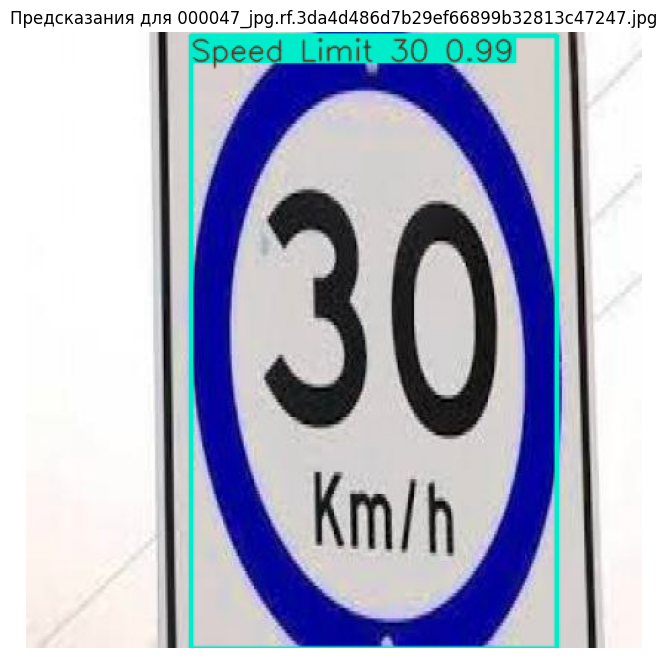


image 1/1 /kaggle/working/cardetection/car/valid/images/00004_00037_00010_png.rf.2d548b82f656367528a9b69d5b6b82cf.jpg: 640x640 1 Speed Limit 70, 7.2ms
Speed: 2.5ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


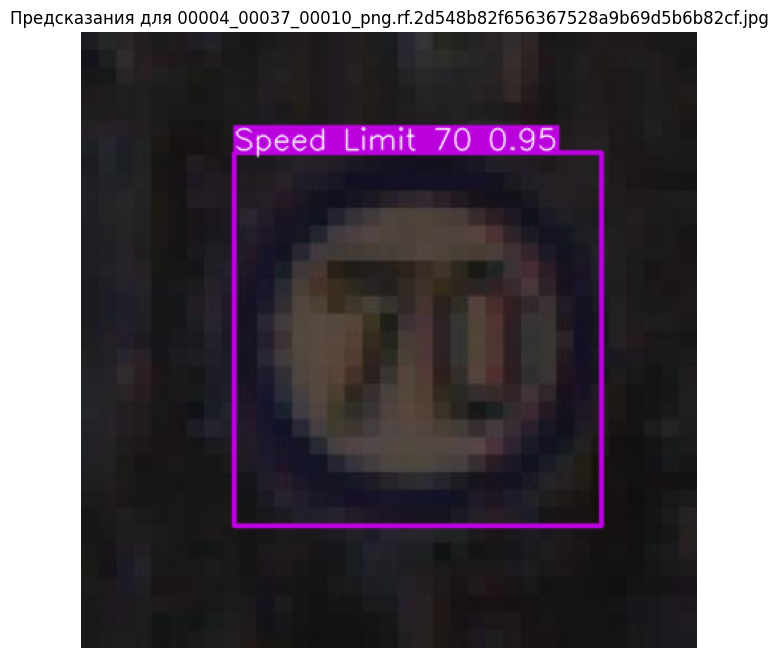


image 1/1 /kaggle/working/cardetection/car/valid/images/FisheyeCamera_1_00024_png.rf.6e8449427dba9d7c378350971670e829.jpg: 640x640 (no detections), 7.4ms
Speed: 3.2ms preprocess, 7.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


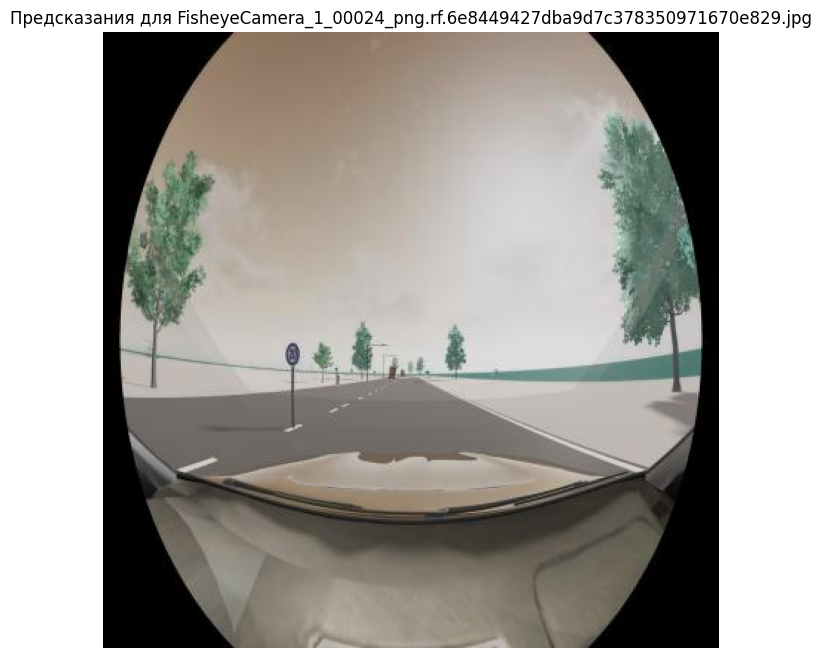


image 1/1 /kaggle/working/cardetection/car/valid/images/000471_jpg.rf.7cff1942730924579c87c484642b6e9f.jpg: 640x640 1 Speed Limit 70, 10.1ms
Speed: 3.4ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


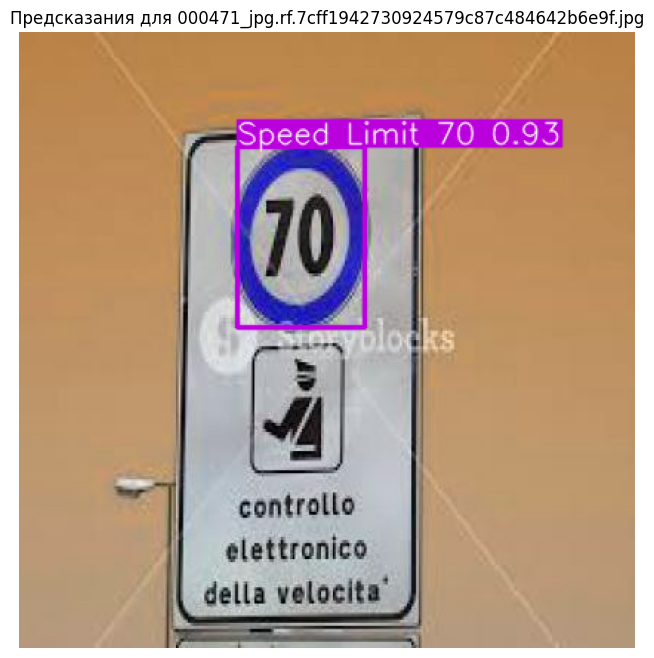


image 1/1 /kaggle/working/cardetection/car/valid/images/00000_00001_00014_png.rf.f4a23099ee55a117ddbdf614f0060111.jpg: 640x640 1 Speed Limit 20, 7.2ms
Speed: 2.3ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


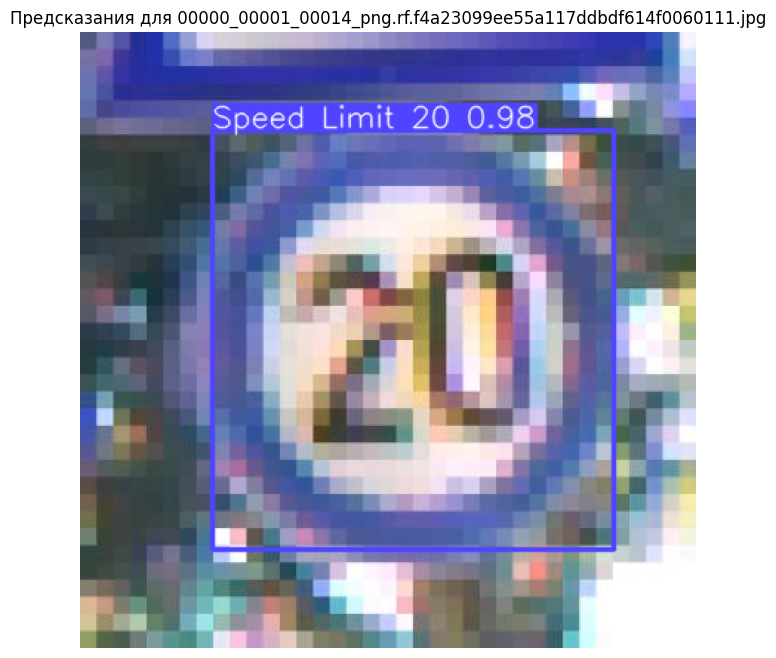


Сводная статистика модели:
Ultralytics 8.3.129 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 595.4±266.8 MB/s, size: 26.2 KB)


val: Scanning /kaggle/working/cardetection/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:05<00:00,  8.51it/s]


                   all        801        944      0.922      0.857      0.925      0.798
           Green Light         87        122      0.795      0.697      0.763       0.46
             Red Light         74        108      0.821      0.741      0.772      0.459
       Speed Limit 100         52         52      0.805      0.942      0.956      0.871
       Speed Limit 110         17         17       0.94      0.926      0.986      0.908
       Speed Limit 120         60         60      0.997      0.883      0.976      0.886
        Speed Limit 20         56         56      0.983      0.893      0.976      0.838
        Speed Limit 30         71         74      0.975      0.946      0.975      0.913
        Speed Limit 40         53         55      0.979      0.927      0.977      0.859
        Speed Limit 50         68         71          1      0.803      0.938      0.845
        Speed Limit 60         76         76      0.931      0.868      0.938      0.838
        Speed Limit 7

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.5ms preprocess, 2.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val4
Точность (Precision): 0.9247
mAP50: 0.9247
mAP50-95: 0.7979


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [ ]:
trained_model = YOLO('runs/detect/yolov8_car_detection6/weights/best.pt')

val_images = glob.glob('/kaggle/working/cardetection/car/valid/images/*.jpg')[:5]

for i, img_path in enumerate(val_images):
    if i > 5:
        break
    results = trained_model(img_path)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    result_img = results[0].plot()
    ax.imshow(result_img)
    ax.axis('off')
    plt.title(f'Предсказания для {os.path.basename(img_path)}')
    plt.show()


print("\nСводная статистика модели:")
metrics = trained_model.val(data="/kaggle/working/cardetection/car/data.yaml")
print(f"Точность (Precision): {metrics.box.map50:.4f}")
print(f"mAP50: {metrics.box.map50:.4f}")
print(f"mAP50-95: {metrics.box.map:.4f}")

# Улучшение baseline

Гипотезы: 
- Более крупная модель (medium) даст лучшие результаты, чем nano версия;
- Увеличение количества эпох позволит модели лучше выучить паттерны;
- Оптимизированные параметры learning rate дадут лучшую сходимость;
- Комбинация различных методов аугментации улучшит обобщающую способность;

In [38]:
# Используем более крупную модель для лучшего качества
model = YOLO('yolov8m.pt')  # Используем среднюю модель вместо nano для лучшего баланса между скоростью и точностью

results = model.train(
    data="/kaggle/working/cardetection/car/data.yaml",
    epochs=20,  # Увеличиваем количество эпох для лучшего обучения
    imgsz=640,
    batch=16,
    patience=5,  # Добавляем раннюю остановку для предотвращения переобучения
    lr0=0.01,  # Настраиваем начальную скорость обучения
    lrf=0.001,  # Настраиваем конечную скорость обучения
    augment=True,  # Включаем аугментацию данных
    mixup=0.1,  # Добавляем mixup для улучшения обобщения
    mosaic=1.0,  # Используем мозаику для аугментации
    name='yolov8_car_detection_improved'
)

100%|██████████| 49.7M/49.7M [00:00<00:00, 277MB/s]


Ultralytics 8.3.129 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/cardetection/car/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.001, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_car_detection_improved, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, pe

train: Scanning /kaggle/working/cardetection/car/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 457.8±352.6 MB/s, size: 20.7 KB)


val: Scanning /kaggle/working/cardetection/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8_car_detection_improved/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/yolov8_car_detection_improved
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      8.04G     0.8529      2.499      1.199         24        640: 100%|██████████| 221/221 [02:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.44it/s]

                   all        801        944      0.402      0.508      0.416      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         8G     0.8034      1.685      1.136         21        640: 100%|██████████| 221/221 [02:18<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.44it/s]

                   all        801        944      0.529      0.566      0.577      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         8G     0.8021      1.457      1.133         18        640: 100%|██████████| 221/221 [02:17<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.45it/s]

                   all        801        944      0.748      0.681      0.736      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      8.26G     0.7729      1.347      1.116         30        640: 100%|██████████| 221/221 [02:17<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.46it/s]

                   all        801        944      0.753      0.694      0.773      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      8.09G     0.7441      1.208      1.091         16        640: 100%|██████████| 221/221 [02:17<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.46it/s]

                   all        801        944      0.812      0.753      0.829      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         8G     0.7175      1.111      1.078         34        640:  89%|████████▉ | 197/221 [02:02<00:14,  1.61it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      8.27G     0.7006      1.053      1.068         19        640: 100%|██████████| 221/221 [02:17<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.46it/s]

                   all        801        944      0.845      0.815      0.871      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      8.26G     0.6823     0.9828      1.057         31        640: 100%|██████████| 221/221 [02:17<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.46it/s]

                   all        801        944      0.933      0.811      0.906      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      8.28G     0.6636     0.9103       1.04         29        640: 100%|██████████| 221/221 [02:17<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.45it/s]

                   all        801        944      0.936      0.842      0.917      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         8G     0.6466     0.8895      1.031         29        640: 100%|██████████| 221/221 [02:17<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.46it/s]

                   all        801        944      0.921       0.85      0.921      0.772


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      8.28G     0.6214     0.5692     0.9926         10        640: 100%|██████████| 221/221 [02:17<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.46it/s]

                   all        801        944      0.919      0.821       0.91      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       8.1G     0.6008     0.5222     0.9759          9        640: 100%|██████████| 221/221 [02:17<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.46it/s]

                   all        801        944      0.947      0.865      0.936      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      8.09G     0.5903     0.4741     0.9671         11        640: 100%|██████████| 221/221 [02:17<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.47it/s]

                   all        801        944      0.948       0.87      0.942      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         8G     0.5735     0.4558      0.965         11        640: 100%|██████████| 221/221 [02:17<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.47it/s]

                   all        801        944      0.935      0.885      0.949      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      8.28G     0.5635     0.4184     0.9581         11        640: 100%|██████████| 221/221 [02:17<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.47it/s]

                   all        801        944      0.927      0.874       0.95      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       8.1G     0.5517     0.3954     0.9473         10        640: 100%|██████████| 221/221 [02:17<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.47it/s]

                   all        801        944      0.958      0.897      0.962      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       8.1G     0.5366     0.3701      0.938         11        640: 100%|██████████| 221/221 [02:17<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.46it/s]

                   all        801        944      0.955      0.903       0.96      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         8G      0.525     0.3562     0.9312         10        640: 100%|██████████| 221/221 [02:17<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.47it/s]

                   all        801        944      0.965      0.915      0.967      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      8.28G     0.5092      0.329     0.9174         10        640: 100%|██████████| 221/221 [02:17<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.47it/s]

                   all        801        944      0.955      0.921      0.967      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      8.28G     0.4975     0.3221     0.9175         14        640: 100%|██████████| 221/221 [02:17<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.47it/s]

                   all        801        944      0.955      0.933      0.972      0.838



20 epochs completed in 0.831 hours.
Optimizer stripped from runs/detect/yolov8_car_detection_improved/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/yolov8_car_detection_improved/weights/best.pt, 52.0MB

Validating runs/detect/yolov8_car_detection_improved/weights/best.pt...
Ultralytics 8.3.129 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 92 layers, 25,848,445 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:22<00:00,  1.14it/s]


                   all        801        944      0.966      0.915      0.969      0.838
           Green Light         87        122      0.849      0.737       0.86      0.526
             Red Light         74        108      0.867      0.694      0.848      0.529
       Speed Limit 100         52         52          1      0.955      0.994      0.902
       Speed Limit 110         17         17      0.963          1      0.995      0.923
       Speed Limit 120         60         60          1      0.939      0.995      0.931
        Speed Limit 20         56         56      0.992      0.982      0.986      0.854
        Speed Limit 30         71         74      0.977      0.959       0.99      0.923
        Speed Limit 40         53         55      0.963      0.939      0.987      0.876
        Speed Limit 50         68         71      0.985      0.939       0.99      0.876
        Speed Limit 60         76         76      0.966      0.934       0.98      0.889
        Speed Limit 7

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 24.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/yolov8_car_detection_improved



image 1/1 /kaggle/working/cardetection/car/valid/images/000931_jpg.rf.10845be9d30ac9cc28dfb6f98e79c4b9.jpg: 640x640 1 Green Light, 16.1ms
Speed: 2.4ms preprocess, 16.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


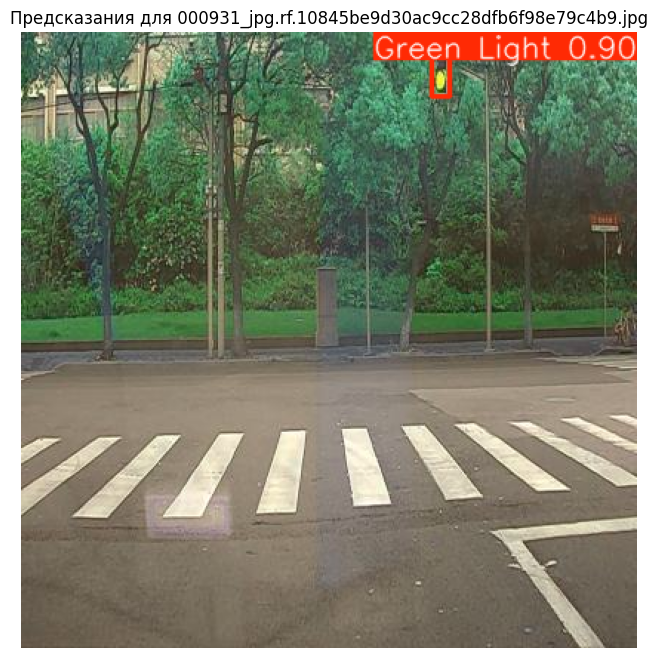


image 1/1 /kaggle/working/cardetection/car/valid/images/000760_jpg.rf.488c72e9b38fa4dc13f144e8810537fb.jpg: 640x640 1 Speed Limit 90, 16.4ms
Speed: 3.2ms preprocess, 16.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


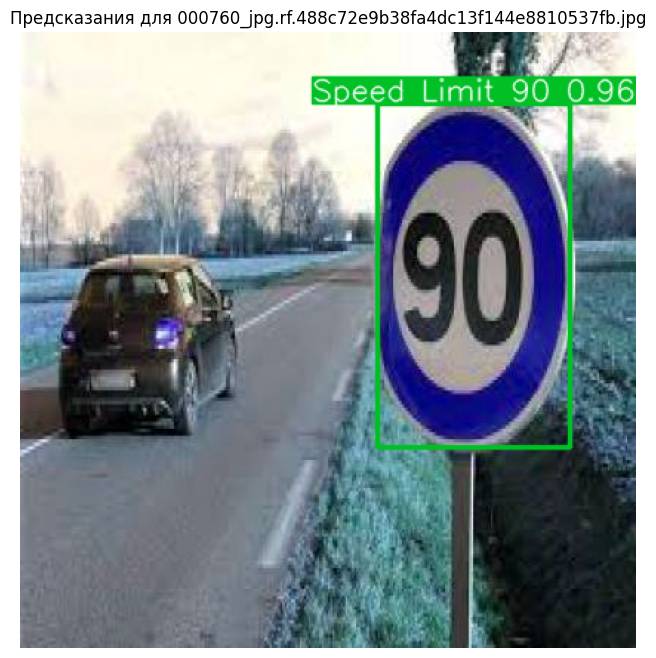


image 1/1 /kaggle/working/cardetection/car/valid/images/000460_jpg.rf.3be56562d86269ad806603bb1cdb710c.jpg: 640x640 1 Speed Limit 70, 16.2ms
Speed: 3.2ms preprocess, 16.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


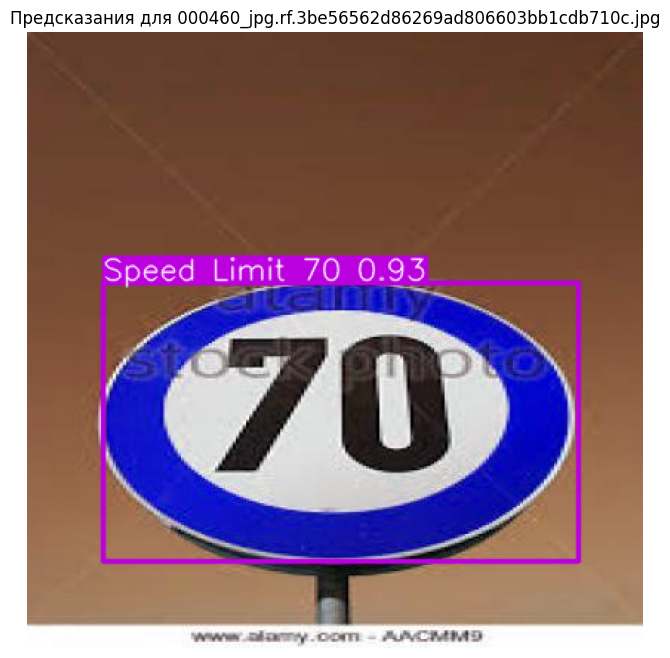


image 1/1 /kaggle/working/cardetection/car/valid/images/00000_00000_00003_png.rf.e1d0c6904cad2c27548ec3c332b2e088.jpg: 640x640 1 Speed Limit 20, 16.4ms
Speed: 2.6ms preprocess, 16.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


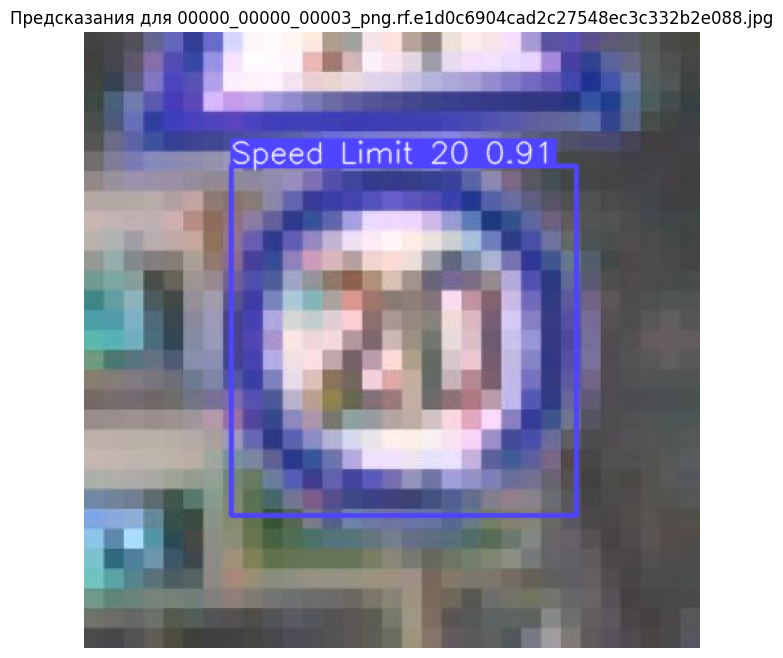


image 1/1 /kaggle/working/cardetection/car/valid/images/road769_png.rf.b448ee15665aa9198508c0007ecfff13.jpg: 640x640 1 Speed Limit 80, 16.3ms
Speed: 2.5ms preprocess, 16.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


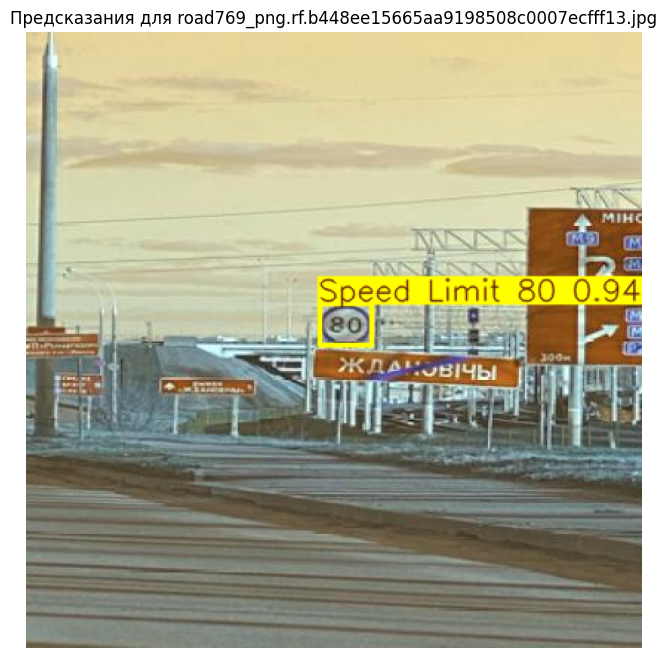


Сводная статистика модели:
Ultralytics 8.3.129 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 702.8±275.7 MB/s, size: 19.7 KB)


val: Scanning /kaggle/working/cardetection/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.18it/s]


                   all        801        944      0.955      0.933      0.972       0.84
           Green Light         87        122      0.853      0.812      0.877      0.537
             Red Light         74        108      0.851      0.815      0.851       0.53
       Speed Limit 100         52         52          1      0.959      0.995      0.901
       Speed Limit 110         17         17      0.907          1      0.995      0.922
       Speed Limit 120         60         60          1       0.96      0.994      0.917
        Speed Limit 20         56         56      0.971      0.982      0.987       0.84
        Speed Limit 30         71         74      0.962      0.959       0.99      0.926
        Speed Limit 40         53         55      0.946      0.945      0.988      0.893
        Speed Limit 50         68         71      0.985      0.942       0.99      0.876
        Speed Limit 60         76         76      0.978      0.934      0.983      0.895
        Speed Limit 7

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.5ms preprocess, 10.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val5
Точность (Precision): 0.9720
mAP50: 0.9720
mAP50-95: 0.8398


In [39]:
trained_model = YOLO('runs/detect/yolov8_car_detection_improved/weights/best.pt')

val_images = glob.glob('/kaggle/working/cardetection/car/valid/images/*.jpg')[10:15]

for i, img_path in enumerate(val_images):
    results = trained_model(img_path)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    result_img = results[0].plot()
    ax.imshow(result_img)
    ax.axis('off')
    plt.title(f'Предсказания для {os.path.basename(img_path)}')
    plt.show()


print("\nСводная статистика модели:")
metrics = trained_model.val(data="/kaggle/working/cardetection/car/data.yaml")
print(f"Точность (Precision): {metrics.box.map50:.4f}")
print(f"mAP50: {metrics.box.map50:.4f}")
print(f"mAP50-95: {metrics.box.map:.4f}")

Ultralytics 8.3.129 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 492.6±226.4 MB/s, size: 11.9 KB)


val: Scanning /kaggle/working/cardetection/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:06<00:00,  8.50it/s]


                   all        801        944      0.922      0.857      0.925      0.798
           Green Light         87        122      0.795      0.697      0.763       0.46
             Red Light         74        108      0.821      0.741      0.772      0.459
       Speed Limit 100         52         52      0.805      0.942      0.956      0.871
       Speed Limit 110         17         17       0.94      0.926      0.986      0.908
       Speed Limit 120         60         60      0.997      0.883      0.976      0.886
        Speed Limit 20         56         56      0.983      0.893      0.976      0.838
        Speed Limit 30         71         74      0.975      0.946      0.975      0.913
        Speed Limit 40         53         55      0.979      0.927      0.977      0.859
        Speed Limit 50         68         71          1      0.803      0.938      0.845
        Speed Limit 60         76         76      0.931      0.868      0.938      0.838
        Speed Limit 7

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.6ms preprocess, 2.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val6


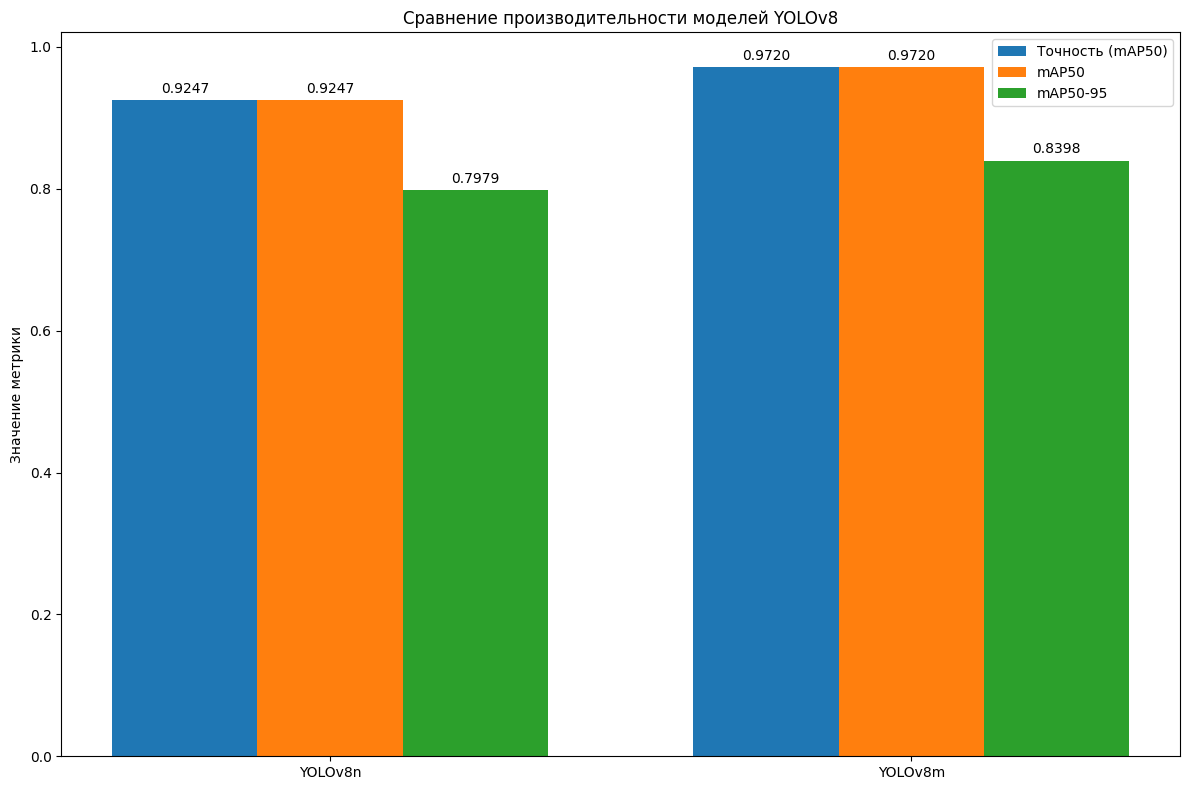


Сравнение моделей:
YOLOv8n - Точность: 0.9247, mAP50: 0.9247, mAP50-95: 0.7979
YOLOv8m - Точность: 0.9720, mAP50: 0.9720, mAP50-95: 0.8398
Улучшение mAP50-95: 5.25%


In [40]:
model_nano = YOLO('runs/detect/yolov8_car_detection6/weights/best.pt')
metrics_nano = model_nano.val(data="/kaggle/working/cardetection/car/data.yaml")

metrics_medium = metrics

models = ['YOLOv8n', 'YOLOv8m']
precision = [metrics_nano.box.map50, metrics_medium.box.map50]
map50 = [metrics_nano.box.map50, metrics_medium.box.map50]
map50_95 = [metrics_nano.box.map, metrics_medium.box.map]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width, precision, width, label='Точность (mAP50)')
rects2 = ax.bar(x, map50, width, label='mAP50')
rects3 = ax.bar(x + width, map50_95, width, label='mAP50-95')

ax.set_ylabel('Значение метрики')
ax.set_title('Сравнение производительности моделей YOLOv8')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()

print("\nСравнение моделей:")
print(f"YOLOv8n - Точность: {metrics_nano.box.map50:.4f}, mAP50: {metrics_nano.box.map50:.4f}, mAP50-95: {metrics_nano.box.map:.4f}")
print(f"YOLOv8m - Точность: {metrics_medium.box.map50:.4f}, mAP50: {metrics_medium.box.map50:.4f}, mAP50-95: {metrics_medium.box.map:.4f}")
print(f"Улучшение mAP50-95: {(metrics_medium.box.map - metrics_nano.box.map) / metrics_nano.box.map * 100:.2f}%")


Все гипотезы подтвердились

# Собственная реализация детекции

Определим датасет

In [ ]:
class CarDetectionDataset(Dataset):
    def __init__(self, yaml_file, img_size=640, transform=None, is_train=True):
        # Загрузка конфигурации из YAML файла
        with open(yaml_file, 'r') as f:
            self.yaml_data = yaml.safe_load(f)
        
        self.root_dir = os.path.dirname(yaml_file)
        self.img_dir = os.path.join(self.root_dir, 'train' if is_train else 'valid', 'images')
        self.label_dir = os.path.join(self.root_dir, 'train' if is_train else 'valid', 'labels')
        
        self.img_files = sorted([f for f in os.listdir(self.img_dir) if f.endswith(('.jpg', '.jpeg', '.png'))])
        
        self.img_size = img_size
        self.transform = transform
        self.is_train = is_train
        self.class_names = self.yaml_data['names']
        self.num_classes = len(self.class_names)
    
    def __len__(self):
        return len(self.img_files)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_files[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        label_file = os.path.splitext(self.img_files[idx])[0] + '.txt'
        label_path = os.path.join(self.label_dir, label_file)
        
        boxes = []
        labels = []
        
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f.readlines():
                    data = line.strip().split()
                    if len(data) == 5:
                        class_id = int(data[0])
                        x_center = float(data[1])
                        y_center = float(data[2])
                        width = float(data[3])
                        height = float(data[4])
                        
                        # Преобразование из формата YOLO (x_center, y_center, width, height) в (x_min, y_min, x_max, y_max)
                        x_min = (x_center - width/2)
                        y_min = (y_center - height/2)
                        x_max = (x_center + width/2)
                        y_max = (y_center + height/2)
                        
                        boxes.append([x_min, y_min, x_max, y_max])
                        labels.append(class_id)
        
        boxes = np.array(boxes, dtype=np.float32)
        labels = np.array(labels, dtype=np.int64)
        
        if self.transform and len(boxes) > 0:
            h, w, _ = img.shape
            abs_boxes = boxes.copy()
            abs_boxes[:, [0, 2]] *= w
            abs_boxes[:, [1, 3]] *= h
            
            transformed = self.transform(image=img, bboxes=abs_boxes, labels=labels)
            img = transformed['image']
            
            if len(transformed['bboxes']) > 0:
                transformed_boxes = np.array(transformed['bboxes'], dtype=np.float32)
                h_new, w_new = img.shape[:2] if isinstance(img, np.ndarray) else img.shape[1:]
                transformed_boxes[:, [0, 2]] /= w_new
                transformed_boxes[:, [1, 3]] /= h_new
                boxes = transformed_boxes
                labels = np.array(transformed['labels'], dtype=np.int64)
            else:
                boxes = np.zeros((0, 4), dtype=np.float32)
                labels = np.zeros(0, dtype=np.int64)
        
        if len(boxes) == 0:
            boxes = np.zeros((0, 4), dtype=np.float32)
            labels = np.zeros(0, dtype=np.int64)
        
        return {
            'image': img,
            'boxes': boxes,
            'labels': labels,
            'image_id': idx,
            'image_path': img_path
        }
    

def visualize_sample(dataset, idx=0):
    sample = dataset[idx]
    img = sample['image']
    boxes = sample['boxes']
    labels = sample['labels']
    
    if isinstance(img, torch.Tensor):
        img = img.permute(1, 2, 0).numpy()
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    
    h, w = img.shape[:2]
    
    for box, label in zip(boxes, labels):
        x_min, y_min, x_max, y_max = box
        x_min, x_max = x_min * w, x_max * w
        y_min, y_max = y_min * h, y_max * h
        
        rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, 
                             fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
        
        class_name = dataset.class_names[label]
        plt.text(x_min, y_min - 5, f'{class_name}', 
                 bbox=dict(facecolor='red', alpha=0.5), fontsize=12, color='white')
    
    plt.axis('off')
    plt.title(f'Изображение с аннотациями (индекс: {idx})')
    plt.show()


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.6' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
ls /kaggle/working/cardetection/car

data.yaml  README.dataset.txt  README.roboflow.txt  test/  train/  valid/


In [3]:
img_size = 256

train_transform = A.Compose([
    A.Resize(img_size, img_size),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))

valid_transform = A.Compose([
    A.Resize(img_size, img_size),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))

yaml_path = '/kaggle/working/cardetection/car/data.yaml'

train_dataset = CarDetectionDataset(
    yaml_file=yaml_path,
    img_size=img_size,
    transform=train_transform,
    is_train=True
)

val_dataset = CarDetectionDataset(
    yaml_file=yaml_path,
    img_size=img_size,
    transform=valid_transform,
    is_train=False
)

train_loader = DataLoader(
    train_dataset,
    batch_size=16,
    shuffle=True,
    num_workers=2,
    pin_memory=True,  
    collate_fn=lambda x: x
)

val_loader = DataLoader(
    val_dataset,
    batch_size=16,
    shuffle=False,
    num_workers=2,
    pin_memory=True,  
    collate_fn=lambda x: x
)

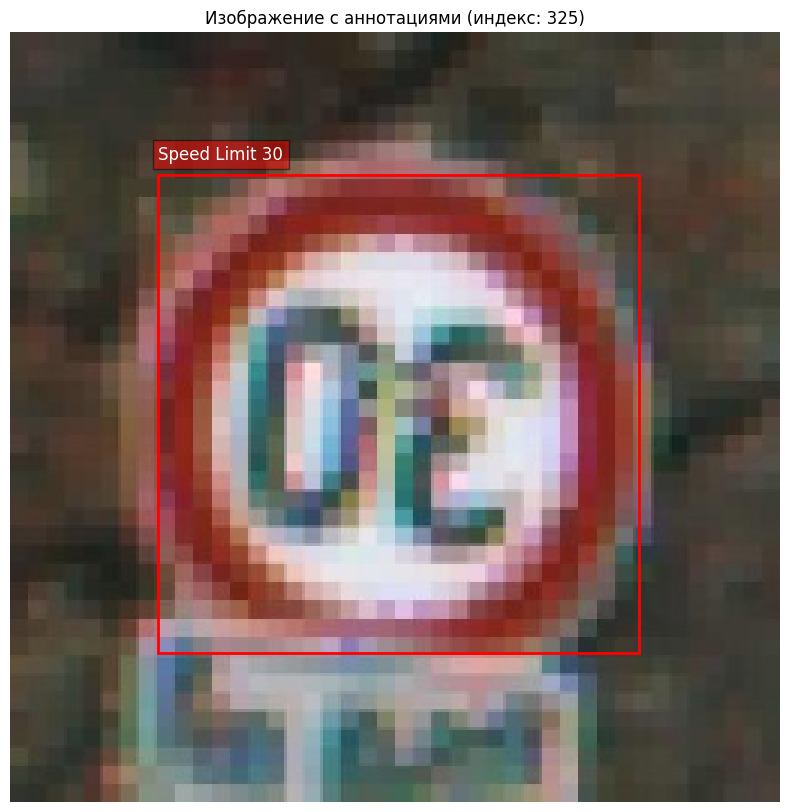

In [4]:
visualize_sample(train_dataset, idx=np.random.randint(0, len(train_dataset)))

In [5]:
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super(ConvBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.LeakyReLU(0.1)
    
    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        return x

class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super(SEBlock, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channels, channels // reduction, bias=False),
            nn.ReLU(),
            nn.Linear(channels // reduction, channels, bias=False),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

class ResidualBlock(nn.Module):
    def __init__(self, in_channels):
        super(ResidualBlock, self).__init__()
        self.conv1 = ConvBlock(in_channels, in_channels)
        self.conv2 = ConvBlock(in_channels, in_channels)
        self.se = SEBlock(in_channels)
        self.dropout = nn.Dropout2d(0.1)
    
    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.se(out)
        out = self.dropout(out)
        out = out + residual
        return out

class DownsampleBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DownsampleBlock, self).__init__()
        self.conv = ConvBlock(in_channels, out_channels, stride=2, padding=1)
    
    def forward(self, x):
        return self.conv(x)

class SPPBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(SPPBlock, self).__init__()
        self.conv = ConvBlock(in_channels, out_channels, kernel_size=1, padding=0)
        self.maxpool1 = nn.MaxPool2d(kernel_size=5, stride=1, padding=2)
        self.maxpool2 = nn.MaxPool2d(kernel_size=9, stride=1, padding=4)
        self.maxpool3 = nn.MaxPool2d(kernel_size=13, stride=1, padding=6)
        self.conv_out = ConvBlock(out_channels * 4, out_channels, kernel_size=1, padding=0)
    
    def forward(self, x):
        x = self.conv(x)
        pool1 = self.maxpool1(x)
        pool2 = self.maxpool2(x)
        pool3 = self.maxpool3(x)
        out = torch.cat([x, pool1, pool2, pool3], dim=1)
        out = self.conv_out(out)
        return out

class CarDetectionModel(nn.Module):
    def __init__(self, num_classes):
        super(CarDetectionModel, self).__init__()
        
        self.backbone = nn.ModuleList([
            ConvBlock(3, 16),
            DownsampleBlock(16, 32),
            ResidualBlock(32),
            DownsampleBlock(32, 64),
            ResidualBlock(64),
            DownsampleBlock(64, 128),
            ResidualBlock(128),
            SPPBlock(128, 128),
            ResidualBlock(128)
        ])
        
        self.fpn_p4 = ConvBlock(128, 64, kernel_size=1, padding=0)
        self.fpn_p3 = ConvBlock(64, 64, kernel_size=1, padding=0)
        self.fpn_p2 = ConvBlock(32, 64, kernel_size=1, padding=0)
        
        self.class_head = nn.Sequential(
            ConvBlock(64, 64),
            nn.Conv2d(64, num_classes, kernel_size=3, padding=1)
        )
        self.box_head = nn.Sequential(
            ConvBlock(64, 64),
            nn.Conv2d(64, 4, kernel_size=3, padding=1)
        )
        self.obj_head = nn.Sequential(
            ConvBlock(64, 64),
            nn.Conv2d(64, 1, kernel_size=3, padding=1)
        )
    
    def forward(self, x):
        features = []
        for i, layer in enumerate(self.backbone):
            x = layer(x)
            if i in [2, 4, 6, 8]:
                features.append(x)
        
        p2, p3, p4, p5 = features
        
        p4 = self.fpn_p4(p4)
        p3 = self.fpn_p3(p3)
        p3 = p3 + F.interpolate(p4, size=p3.shape[2:], mode='bilinear', align_corners=True)
        
        p2 = self.fpn_p2(p2)
        p2 = p2 + F.interpolate(p3, size=p2.shape[2:], mode='bilinear', align_corners=True)
        
        outputs = []
        for feature in [p2, p3, p4]:
            class_pred = self.class_head(feature)
            box_pred = self.box_head(feature)
            obj_pred = self.obj_head(feature)
            
            output = torch.cat([box_pred, obj_pred, class_pred], dim=1)
            outputs.append(output)
        
        return outputs

In [21]:
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super(ConvBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.LeakyReLU(0.1)
    
    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        return x

class SEBlock(nn.Module):
    def __init__(self, channels, reduction=8):
        super(SEBlock, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channels, channels // reduction, bias=False),
            nn.ReLU(),
            nn.Linear(channels // reduction, channels, bias=False),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

class ResidualBlock(nn.Module):
    def __init__(self, in_channels):
        super(ResidualBlock, self).__init__()
        self.conv1 = ConvBlock(in_channels, in_channels)
        self.conv2 = ConvBlock(in_channels, in_channels)
        self.se = SEBlock(in_channels)
        self.dropout = nn.Dropout2d(0.2)
    
    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.se(out)
        out = self.dropout(out)
        out = out + residual
        return out

class DownsampleBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DownsampleBlock, self).__init__()
        self.conv = ConvBlock(in_channels, out_channels, stride=2, padding=1)
        self.residual = ResidualBlock(out_channels)
    
    def forward(self, x):
        x = self.conv(x)
        x = self.residual(x)
        return x

class SPPBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(SPPBlock, self).__init__()
        self.conv = ConvBlock(in_channels, out_channels, kernel_size=1, padding=0)
        self.maxpool1 = nn.MaxPool2d(kernel_size=5, stride=1, padding=2)
        self.maxpool2 = nn.MaxPool2d(kernel_size=9, stride=1, padding=4)
        self.maxpool3 = nn.MaxPool2d(kernel_size=13, stride=1, padding=6)
        self.maxpool4 = nn.MaxPool2d(kernel_size=17, stride=1, padding=8) 
        self.conv_out = ConvBlock(out_channels * 5, out_channels, kernel_size=1, padding=0)
    
    def forward(self, x):
        x = self.conv(x)
        pool1 = self.maxpool1(x)
        pool2 = self.maxpool2(x)
        pool3 = self.maxpool3(x)
        pool4 = self.maxpool4(x)
        out = torch.cat([x, pool1, pool2, pool3, pool4], dim=1)
        out = self.conv_out(out)
        return out

class CBAM(nn.Module):
    def __init__(self, channels, reduction=16):
        super(CBAM, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.fc = nn.Sequential(
            nn.Conv2d(channels, channels // reduction, 1, bias=False),
            nn.ReLU(),
            nn.Conv2d(channels // reduction, channels, 1, bias=False)
        )
        self.sigmoid_channel = nn.Sigmoid()
        
        self.conv_spatial = nn.Conv2d(2, 1, kernel_size=7, padding=3, bias=False)
        self.sigmoid_spatial = nn.Sigmoid()
        
    def forward(self, x):
        avg_out = self.fc(self.avg_pool(x))
        max_out = self.fc(self.max_pool(x))
        channel_out = self.sigmoid_channel(avg_out + max_out)
        x = x * channel_out
        
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        spatial_out = torch.cat([avg_out, max_out], dim=1)
        spatial_out = self.conv_spatial(spatial_out)
        spatial_out = self.sigmoid_spatial(spatial_out)
        x = x * spatial_out
        
        return x

class CarDetectionModel(nn.Module):
    def __init__(self, num_classes):
        super(CarDetectionModel, self).__init__()
        
        self.backbone = nn.ModuleList([
            ConvBlock(3, 32),
            DownsampleBlock(32, 64),
            ResidualBlock(64),
            ResidualBlock(64),
            DownsampleBlock(64, 128),
            ResidualBlock(128),
            ResidualBlock(128),
            DownsampleBlock(128, 256),
            ResidualBlock(256),
            ResidualBlock(256),
            SPPBlock(256, 256),
            CBAM(256),
            ResidualBlock(256)
        ])
        
        self.fpn_p5 = ConvBlock(256, 128, kernel_size=1, padding=0)
        self.fpn_p4 = ConvBlock(256, 128, kernel_size=1, padding=0)
        self.fpn_p3 = ConvBlock(128, 128, kernel_size=1, padding=0)
        self.fpn_p2 = ConvBlock(64, 128, kernel_size=1, padding=0)
        
        self.fpn_conv_p5 = ConvBlock(128, 128)
        self.fpn_conv_p4 = ConvBlock(128, 128)
        self.fpn_conv_p3 = ConvBlock(128, 128)
        self.fpn_conv_p2 = ConvBlock(128, 128)
        
        self.class_head = nn.Sequential(
            ConvBlock(128, 128),
            ConvBlock(128, 128),
            nn.Conv2d(128, num_classes, kernel_size=3, padding=1)
        )
        self.box_head = nn.Sequential(
            ConvBlock(128, 128),
            ConvBlock(128, 128),
            nn.Conv2d(128, 4, kernel_size=3, padding=1)
        )
        self.obj_head = nn.Sequential(
            ConvBlock(128, 128),
            ConvBlock(128, 64),
            nn.Conv2d(64, 1, kernel_size=3, padding=1)
        )
    
    def forward(self, x):
        features = []
        for i, layer in enumerate(self.backbone):
            x = layer(x)
            if i in [3, 6, 9, 12]:
                features.append(x)
        
        p2, p3, p4, p5 = features
        
        p5_out = self.fpn_p5(p5)
        
        p4 = self.fpn_p4(p4)
        p4_out = p4 + F.interpolate(p5_out, size=p4.shape[2:], mode='bilinear', align_corners=True)
        p4_out = self.fpn_conv_p4(p4_out)
        
        p3 = self.fpn_p3(p3)
        p3_out = p3 + F.interpolate(p4_out, size=p3.shape[2:], mode='bilinear', align_corners=True)
        p3_out = self.fpn_conv_p3(p3_out)
        
        p2 = self.fpn_p2(p2)
        p2_out = p2 + F.interpolate(p3_out, size=p2.shape[2:], mode='bilinear', align_corners=True)
        p2_out = self.fpn_conv_p2(p2_out)
        
        outputs = []
        for feature in [p2_out, p3_out, p4_out, p5_out]:
            class_pred = self.class_head(feature)
            box_pred = self.box_head(feature)
            obj_pred = self.obj_head(feature)
            
            output = torch.cat([box_pred, obj_pred, class_pred], dim=1)
            outputs.append(output)
        
        return outputs

In [6]:
class YOLOLoss(nn.Module):
    def __init__(self, lambda_box=1.0, lambda_obj=1.0, lambda_cls=1.0):
        super(YOLOLoss, self).__init__()
        self.mse = nn.MSELoss(reduction='sum')
        self.bce = nn.BCEWithLogitsLoss(reduction='sum')
        self.lambda_box = lambda_box
        self.lambda_obj = lambda_obj
        self.lambda_cls = lambda_cls
        
    def forward(self, predictions, targets):
        device = predictions[0]['boxes'].device
        total_loss = torch.tensor(0.0, device=device)
        box_loss = torch.tensor(0.0, device=device)
        obj_loss = torch.tensor(0.0, device=device)
        cls_loss = torch.tensor(0.0, device=device)
        count = 0
        
        for batch_item in range(len(predictions)):
            pred = predictions[batch_item]
            target = targets[batch_item]
            
            pred_boxes = pred['boxes']
            pred_scores = pred['scores']
            pred_labels = pred['labels']
            
            target_boxes = target['boxes']
            target_labels = target['labels']
            
            if len(target_boxes) == 0:
                if len(pred_scores) > 0:
                    obj_loss += self.bce(pred_scores, torch.zeros_like(pred_scores))
                continue
                
            if len(pred_boxes) == 0:
                continue
            
            # Вычисляем IoU между всеми парами боксов (векторизованно)
            # [num_targets, num_preds]
            ious = self.vectorized_box_iou(target_boxes, pred_boxes)
            
            # Находим лучшие предсказания для каждого целевого объекта
            best_ious, best_idxs = ious.max(dim=1)
            
            box_loss += self.mse(pred_boxes[best_idxs], target_boxes)
            
            # confidence
            obj_targets = torch.ones_like(pred_scores[best_idxs])
            obj_loss += self.bce(pred_scores[best_idxs], obj_targets)
            
            # Классификация
            if pred_labels.size(1) > 1:
                if target_labels.dim() == 1:
                    target_one_hot = torch.zeros_like(pred_labels[best_idxs])
                    for i, label_idx in enumerate(target_labels.long()):
                        target_one_hot[i, label_idx] = 1
                    cls_loss += self.bce(pred_labels[best_idxs], target_one_hot)
                else:
                    cls_loss += self.bce(pred_labels[best_idxs], target_labels.float())
            
            count += len(target_boxes)
        
        if count > 0:
            box_loss = box_loss / count
            obj_loss = obj_loss / count
            cls_loss = cls_loss / count
        
        total_loss = self.lambda_box * box_loss + self.lambda_obj * obj_loss + self.lambda_cls * cls_loss
        return total_loss, (box_loss, obj_loss, cls_loss)
    
    def vectorized_box_iou(self, boxes1, boxes2):
        area1 = (boxes1[:, 2] - boxes1[:, 0]) * (boxes1[:, 3] - boxes1[:, 1])  # [N]
        area2 = (boxes2[:, 2] - boxes2[:, 0]) * (boxes2[:, 3] - boxes2[:, 1])  # [M]
        
        area1 = area1[:, None]  # [N, 1]
        area2 = area2[None, :]  # [1, M]
        
        lt = torch.max(boxes1[:, None, :2], boxes2[None, :, :2])  # [N, M, 2]
        rb = torch.min(boxes1[:, None, 2:], boxes2[None, :, 2:])  # [N, M, 2]
        
        wh = (rb - lt).clamp(min=0)  # [N, M, 2]
        inter = wh[:, :, 0] * wh[:, :, 1]  # [N, M]
        
        # IoU
        union = area1 + area2 - inter
        iou = inter / (union + 1e-6)  # [N, M]
        
        return iou
def process_predictions(outputs, device):
    batch_size = outputs[0].shape[0]
    processed_outputs = []
    
    for i in range(batch_size):
        boxes_list = []
        scores_list = []
        labels_list = []
        
        for output in outputs:
            B, C, H, W = output.shape
            num_classes = C - 5  # 4 координаты bbox, 1 objectness, num_classes
            
            output = output.permute(0, 2, 3, 1).contiguous()  # [B, H, W, C]
            output = output.view(B, H*W, C)  # [B, H*W, C]
            
            box_preds = output[i, :, :4]  # [H*W, 4]
            obj_preds = output[i, :, 4]  # [H*W]
            cls_preds = output[i, :, 5:]  # [H*W, num_classes]
            
            keep = obj_preds > 0.1
            
            if keep.sum() > 0:
                box_preds_filtered = box_preds[keep]
                obj_preds_filtered = obj_preds[keep]
                cls_preds_filtered = cls_preds[keep]
                
                boxes_list.append(box_preds_filtered)
                scores_list.append(obj_preds_filtered)
                labels_list.append(cls_preds_filtered)
        
        if len(boxes_list) > 0:
            boxes = torch.cat(boxes_list)
            scores = torch.cat(scores_list)
            labels = torch.cat(labels_list)
            
            processed_outputs.append({
                'boxes': boxes.to(device),
                'scores': scores.to(device),
                'labels': labels.to(device)
            })
        else:
            num_classes = outputs[0].shape[1] - 5
            processed_outputs.append({
                'boxes': torch.empty((0, 4), device=device),
                'scores': torch.empty(0, device=device),
                'labels': torch.empty((0, num_classes), device=device)
            })
    
    return processed_outputs

def prepare_batch(batch, device):
    images = []
    targets = []
    
    for item in batch:
        if isinstance(item['image'], np.ndarray):
            img = torch.from_numpy(item['image']).to(device)
            if img.dim() == 3 and img.shape[2] == 3:
                img = img.permute(2, 0, 1)
        else:
            img = item['image'].to(device)
        
        if isinstance(item['boxes'], np.ndarray):
            boxes = torch.tensor(item['boxes'], dtype=torch.float32).to(device)
        else:
            boxes = item['boxes'].to(device)
            
        if isinstance(item['labels'], np.ndarray):
            labels = torch.tensor(item['labels'], dtype=torch.int64).to(device)
        else:
            labels = item['labels'].to(device)
        
        images.append(img)
        targets.append({
            'boxes': boxes,
            'labels': labels
        })
    
    try:
        images = torch.stack(images)
    except RuntimeError as e:
        print(f"Ошибка при формировании батча: {e}")
        print(f"Размеры изображений: {[img.shape for img in images]}")
        shapes = [img.shape for img in images]
        most_common_shape = max(set(shapes), key=shapes.count)
        valid_indices = [i for i, shape in enumerate(shapes) if shape == most_common_shape]
        
        images = [images[i] for i in valid_indices]
        targets = [targets[i] for i in valid_indices]
        images = torch.stack(images)
    
    return images, targets

def train_model(model, train_loader, val_loader, device, num_epochs=30):
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, factor=0.5)
    criterion = YOLOLoss()
    
    best_val_loss = float('inf')
    history = {'train_loss': [], 'val_loss': []}
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_box_loss = 0.0
        train_obj_loss = 0.0
        train_cls_loss = 0.0
        
        progress_bar = tqdm(train_loader, desc=f'Эпоха {epoch+1}/{num_epochs}')
        
        for batch in progress_bar:
            images, targets = prepare_batch(batch, device)
            
            optimizer.zero_grad()
            
            outputs = model(images)
            processed_outputs = process_predictions(outputs, device)
            
            loss, (box_loss, obj_loss, cls_loss) = criterion(processed_outputs, targets)            
            loss.backward()
            
            optimizer.step()

            
            train_loss += loss.item()
            train_box_loss += box_loss.item()
            train_obj_loss += obj_loss.item()
            train_cls_loss += cls_loss.item()
            
            progress_bar.set_postfix({
                'потеря': f'{loss.item():.4f}',
                'bbox': f'{box_loss.item():.4f}',
                'obj': f'{obj_loss.item():.4f}',
                'cls': f'{cls_loss.item():.4f}'
            })
        
        train_loss /= len(train_loader)
        train_box_loss /= len(train_loader)
        train_obj_loss /= len(train_loader)
        train_cls_loss /= len(train_loader)
        
        model.eval()
        val_loss = 0.0
        val_box_loss = 0.0
        val_obj_loss = 0.0
        val_cls_loss = 0.0
        
        with torch.no_grad():
            for batch in tqdm(val_loader, desc='Валидация'):
                images, targets = prepare_batch(batch, device)
                outputs = model(images)
                processed_outputs = process_predictions(outputs, device)
                loss, (box_loss, obj_loss, cls_loss) = criterion(processed_outputs, targets)
                
                val_loss += loss.item()
                val_box_loss += box_loss.item()
                val_obj_loss += obj_loss.item()
                val_cls_loss += cls_loss.item()
        
        val_loss /= len(val_loader)
        val_box_loss /= len(val_loader)
        val_obj_loss /= len(val_loader)
        val_cls_loss /= len(val_loader)
        
        scheduler.step(val_loss)
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model.pth')
            print(f'Модель сохранена с потерей валидации: {val_loss:.4f}')
        
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        
        print(f'Эпоха {epoch+1}/{num_epochs} завершена.')
        print(f'Потеря обучения: {train_loss:.4f} (bbox: {train_box_loss:.4f}, obj: {train_obj_loss:.4f}, cls: {train_cls_loss:.4f})')
        print(f'Потеря валидации: {val_loss:.4f} (bbox: {val_box_loss:.4f}, obj: {val_obj_loss:.4f}, cls: {val_cls_loss:.4f})')
        print('-' * 50)
    
    return model, history

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = CarDetectionModel(num_classes=len(train_dataset.class_names))

print("Архитектура улучшенного Unet:")
print(model)

total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\nВсего параметров: {total_params:,}")
print(f"Обучаемых параметров: {trainable_params:,}")
print(f"Процент обучаемых параметров: {100 * trainable_params / total_params:.2f}%")

cuda
Архитектура улучшенного Unet:
CarDetectionModel(
  (backbone): ModuleList(
    (0): ConvBlock(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): LeakyReLU(negative_slope=0.1)
    )
    (1): DownsampleBlock(
      (conv): ConvBlock(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): LeakyReLU(negative_slope=0.1)
      )
    )
    (2): ResidualBlock(
      (conv1): ConvBlock(
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): LeakyReLU(negative_slope=0.1)
      )
      (conv2): ConvBlock(
        (conv): Conv2d(32, 32, kernel_size=(3, 3),

Эпоха 1/5:   4%|▍         | 9/221 [00:02<00:43,  4.90it/s, потеря=5.9716, bbox=0.0808, obj=0.2501, cls=5.6407]  

Ошибка при формировании батча: stack expects each tensor to be equal size, but got [3, 256, 256] at entry 0 and [3, 416, 416] at entry 8
Размеры изображений: [torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 416, 416]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256])]


Эпоха 1/5:  12%|█▏        | 27/221 [00:05<00:35,  5.41it/s, потеря=3.7144, bbox=0.0322, obj=0.0169, cls=3.6653]

Ошибка при формировании батча: stack expects each tensor to be equal size, but got [3, 256, 256] at entry 0 and [3, 416, 416] at entry 4
Размеры изображений: [torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 416, 416]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256])]


Эпоха 1/5:  58%|█████▊    | 129/221 [00:25<00:17,  5.30it/s, потеря=3.5624, bbox=0.0710, obj=0.0006, cls=3.4908]

Ошибка при формировании батча: stack expects each tensor to be equal size, but got [3, 256, 256] at entry 0 and [3, 416, 416] at entry 11
Размеры изображений: [torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 416, 416]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256])]


Валидация: 100%|██████████| 51/51 [00:03<00:00, 14.36it/s]


Модель сохранена с потерей валидации: 4.1711
Эпоха 1/5 завершена.
Потеря обучения: 3.7694 (bbox: 0.0754, obj: 0.0166, cls: 3.6775)
Потеря валидации: 4.1711 (bbox: 0.0901, obj: 0.0069, cls: 4.0741)
--------------------------------------------------


Эпоха 2/5:  10%|▉         | 22/221 [00:04<00:37,  5.29it/s, потеря=3.8238, bbox=0.0550, obj=0.0000, cls=3.7687]

Ошибка при формировании батча: stack expects each tensor to be equal size, but got [3, 256, 256] at entry 0 and [3, 416, 416] at entry 3
Размеры изображений: [torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 416, 416]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256])]


Эпоха 2/5:  79%|███████▉  | 175/221 [00:33<00:08,  5.47it/s, потеря=3.7244, bbox=0.0476, obj=0.0000, cls=3.6768]

Ошибка при формировании батча: stack expects each tensor to be equal size, but got [3, 416, 416] at entry 0 and [3, 256, 256] at entry 1
Размеры изображений: [torch.Size([3, 416, 416]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256])]


Эпоха 2/5:  95%|█████████▌| 211/221 [00:40<00:01,  5.38it/s, потеря=3.6078, bbox=0.0222, obj=0.0000, cls=3.5856]

Ошибка при формировании батча: stack expects each tensor to be equal size, but got [3, 256, 256] at entry 0 and [3, 416, 416] at entry 7
Размеры изображений: [torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 416, 416]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256])]


Валидация: 100%|██████████| 51/51 [00:03<00:00, 14.79it/s]


Модель сохранена с потерей валидации: 3.6809
Эпоха 2/5 завершена.
Потеря обучения: 3.4579 (bbox: 0.0744, obj: 0.0001, cls: 3.3834)
Потеря валидации: 3.6809 (bbox: 0.1403, obj: 0.0008, cls: 3.5398)
--------------------------------------------------


Эпоха 3/5:  32%|███▏      | 71/221 [00:13<00:30,  4.92it/s, потеря=3.2626, bbox=0.0502, obj=0.0000, cls=3.2124]

Ошибка при формировании батча: stack expects each tensor to be equal size, but got [3, 256, 256] at entry 0 and [3, 416, 416] at entry 11
Размеры изображений: [torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 416, 416]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256])]


Эпоха 3/5:  48%|████▊     | 106/221 [00:20<00:20,  5.49it/s, потеря=3.7103, bbox=0.0362, obj=0.0000, cls=3.6741]

Ошибка при формировании батча: stack expects each tensor to be equal size, but got [3, 256, 256] at entry 0 and [3, 416, 416] at entry 13
Размеры изображений: [torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 416, 416]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256])]


Эпоха 3/5:  71%|███████   | 156/221 [00:30<00:12,  5.31it/s, потеря=3.6550, bbox=0.0200, obj=0.0000, cls=3.6349]

Ошибка при формировании батча: stack expects each tensor to be equal size, but got [3, 256, 256] at entry 0 and [3, 416, 416] at entry 1
Размеры изображений: [torch.Size([3, 256, 256]), torch.Size([3, 416, 416]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256])]


Валидация: 100%|██████████| 51/51 [00:03<00:00, 14.21it/s]


Модель сохранена с потерей валидации: 3.4738
Эпоха 3/5 завершена.
Потеря обучения: 3.3677 (bbox: 0.0644, obj: 0.0000, cls: 3.3033)
Потеря валидации: 3.4738 (bbox: 0.0639, obj: 0.0011, cls: 3.4088)
--------------------------------------------------


Эпоха 4/5:  12%|█▏        | 27/221 [00:05<00:35,  5.51it/s, потеря=3.5292, bbox=0.0744, obj=0.0001, cls=3.4546]

Ошибка при формировании батча: stack expects each tensor to be equal size, but got [3, 256, 256] at entry 0 and [3, 416, 416] at entry 15
Размеры изображений: [torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 416, 416])]


Эпоха 4/5:  33%|███▎      | 73/221 [00:14<00:27,  5.32it/s, потеря=3.0147, bbox=0.0485, obj=0.0000, cls=2.9662]

Ошибка при формировании батча: stack expects each tensor to be equal size, but got [3, 256, 256] at entry 0 and [3, 416, 416] at entry 12
Размеры изображений: [torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 416, 416]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256])]


Эпоха 4/5:  47%|████▋     | 104/221 [00:19<00:21,  5.34it/s, потеря=3.4331, bbox=0.0418, obj=0.0000, cls=3.3913]

Ошибка при формировании батча: stack expects each tensor to be equal size, but got [3, 256, 256] at entry 0 and [3, 416, 416] at entry 15
Размеры изображений: [torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 416, 416])]


Валидация: 100%|██████████| 51/51 [00:03<00:00, 15.08it/s]


Эпоха 4/5 завершена.
Потеря обучения: 3.2798 (bbox: 0.0614, obj: 0.0000, cls: 3.2184)
Потеря валидации: 3.6706 (bbox: 0.0522, obj: 0.0012, cls: 3.6172)
--------------------------------------------------


Эпоха 5/5:   2%|▏         | 4/221 [00:00<00:47,  4.56it/s, потеря=3.7151, bbox=0.0559, obj=0.0000, cls=3.6592]

Ошибка при формировании батча: stack expects each tensor to be equal size, but got [3, 256, 256] at entry 0 and [3, 416, 416] at entry 8
Размеры изображений: [torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 416, 416]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256])]


Эпоха 5/5:  42%|████▏     | 93/221 [00:18<00:25,  4.99it/s, потеря=3.5269, bbox=0.0526, obj=0.0000, cls=3.4744]

Ошибка при формировании батча: stack expects each tensor to be equal size, but got [3, 256, 256] at entry 0 and [3, 416, 416] at entry 1
Размеры изображений: [torch.Size([3, 256, 256]), torch.Size([3, 416, 416]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256])]


Эпоха 5/5:  78%|███████▊  | 173/221 [00:33<00:09,  5.33it/s, потеря=3.4021, bbox=0.0520, obj=0.0000, cls=3.3501]

Ошибка при формировании батча: stack expects each tensor to be equal size, but got [3, 256, 256] at entry 0 and [3, 416, 416] at entry 3
Размеры изображений: [torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 416, 416]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256]), torch.Size([3, 256, 256])]


Валидация: 100%|██████████| 51/51 [00:03<00:00, 15.08it/s]


Модель сохранена с потерей валидации: 3.4150
Эпоха 5/5 завершена.
Потеря обучения: 3.2369 (bbox: 0.0607, obj: 0.0000, cls: 3.1762)
Потеря валидации: 3.4150 (bbox: 0.0838, obj: 0.0002, cls: 3.3310)
--------------------------------------------------


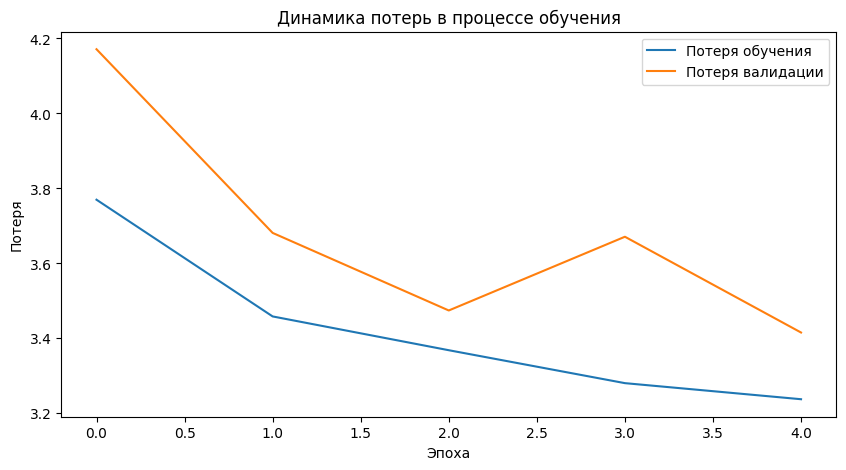

In [ ]:
model, history = train_model(model, train_loader, val_loader, device, num_epochs=15)

plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Потеря обучения')
plt.plot(history['val_loss'], label='Потеря валидации')
plt.xlabel('Эпоха')
plt.ylabel('Потеря')
plt.legend()
plt.title('Динамика потерь в процессе обучения')
plt.savefig('training_loss.png')
plt.show()

In [12]:
def visualize_detection(model, dataset, device, num_samples=5, conf_threshold=0.3, save_path=None):    
    model.eval()

    indices = random.sample(range(len(dataset)), min(num_samples, len(dataset)))

    num_classes = len(dataset.class_names)
    colors = plt.cm.hsv(np.linspace(0, 1, num_classes))
    
    plt.figure(figsize=(15, num_samples * 5))
    
    for i, idx in enumerate(indices):
        sample = dataset[idx]
        img = sample['image']
        true_boxes = sample['boxes']
        true_labels = sample['labels']
        
        if isinstance(img, torch.Tensor):

            if img.dim() == 3 and img.shape[0] == 3:
                img = img.permute(1, 2, 0)
            
            if img.max() <= 1.0:
                mean = torch.tensor([0.485, 0.456, 0.406])
                std = torch.tensor([0.229, 0.224, 0.225])
                img = img * std + mean
                img = img.clamp(0, 1)
            img = img.cpu().numpy()
        
        if isinstance(img, np.ndarray) and img.shape[2] == 3:
            img_tensor = torch.from_numpy(img.copy()).permute(2, 0, 1).float()
            if img_tensor.max() > 1.0:
                img_tensor = img_tensor / 255.0
            
            img_tensor = (img_tensor - torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)) / \
                          torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
        else:
            img_tensor = img.clone()
        
        with torch.no_grad():
            img_batch = img_tensor.unsqueeze(0).to(device)
            outputs = model(img_batch)
            processed_outputs = process_predictions(outputs, device)
            
            pred_boxes = processed_outputs[0]['boxes'].cpu().numpy()
            pred_scores = processed_outputs[0]['scores'].cpu().numpy()
            pred_labels = processed_outputs[0]['labels'].cpu().numpy()
            
            if len(pred_labels.shape) > 1:
                pred_labels = np.argmax(pred_labels, axis=1)
        
        plt.subplot(num_samples, 1, i + 1)
        plt.imshow(img)
        ax = plt.gca()
        
        for box, label_idx in zip(true_boxes, true_labels):
            if isinstance(label_idx, torch.Tensor):
                label_idx = label_idx.item()
            
            x1, y1, x2, y2 = box
            if isinstance(box, torch.Tensor):
                x1, y1, x2, y2 = box.cpu().numpy()
                
            h, w = img.shape[:2]
            if max(x1, y1, x2, y2) <= 1.0:
                x1, x2 = x1 * w, x2 * w
                y1, y2 = y1 * h, y2 * h
            
            width = x2 - x1
            height = y2 - y1
            
            rect = patches.Rectangle(
                (x1, y1), width, height, 
                linewidth=2, edgecolor='green', facecolor='none'
            )
            ax.add_patch(rect)
            
            plt.text(
                x1, y1 - 5, 
                f"{dataset.class_names[label_idx]} (GT)",
                color='green', fontsize=10, backgroundcolor=to_rgba('white', 0.7)
            )
        
        for box, score, label_idx in zip(pred_boxes, pred_scores, pred_labels):
            if score < conf_threshold:
                continue
                
            x1, y1, x2, y2 = box
            
            h, w = img.shape[:2]
            if max(x1, y1, x2, y2) <= 1.0:
                x1, x2 = x1 * w, x2 * w
                y1, y2 = y1 * h, y2 * h
                
            width = x2 - x1
            height = y2 - y1
            
            color = colors[label_idx % len(colors)]

            rect = patches.Rectangle(
                (x1, y1), width, height, 
                linewidth=2, edgecolor=color, facecolor='none'
            )
            ax.add_patch(rect)
            
            class_name = dataset.class_names[label_idx] if label_idx < len(dataset.class_names) else f"Класс {label_idx}"
            plt.text(
                x1, y1 - 5, 
                f"{class_name} ({score:.2f})",
                color=color, fontsize=10, backgroundcolor=to_rgba('white', 0.7)
            )
        
        plt.title(f"Изображение {idx}: {sample['image_path'] if 'image_path' in sample else ''}")
        plt.axis('off')
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Результаты сохранены в {save_path}")
    
    plt.show()

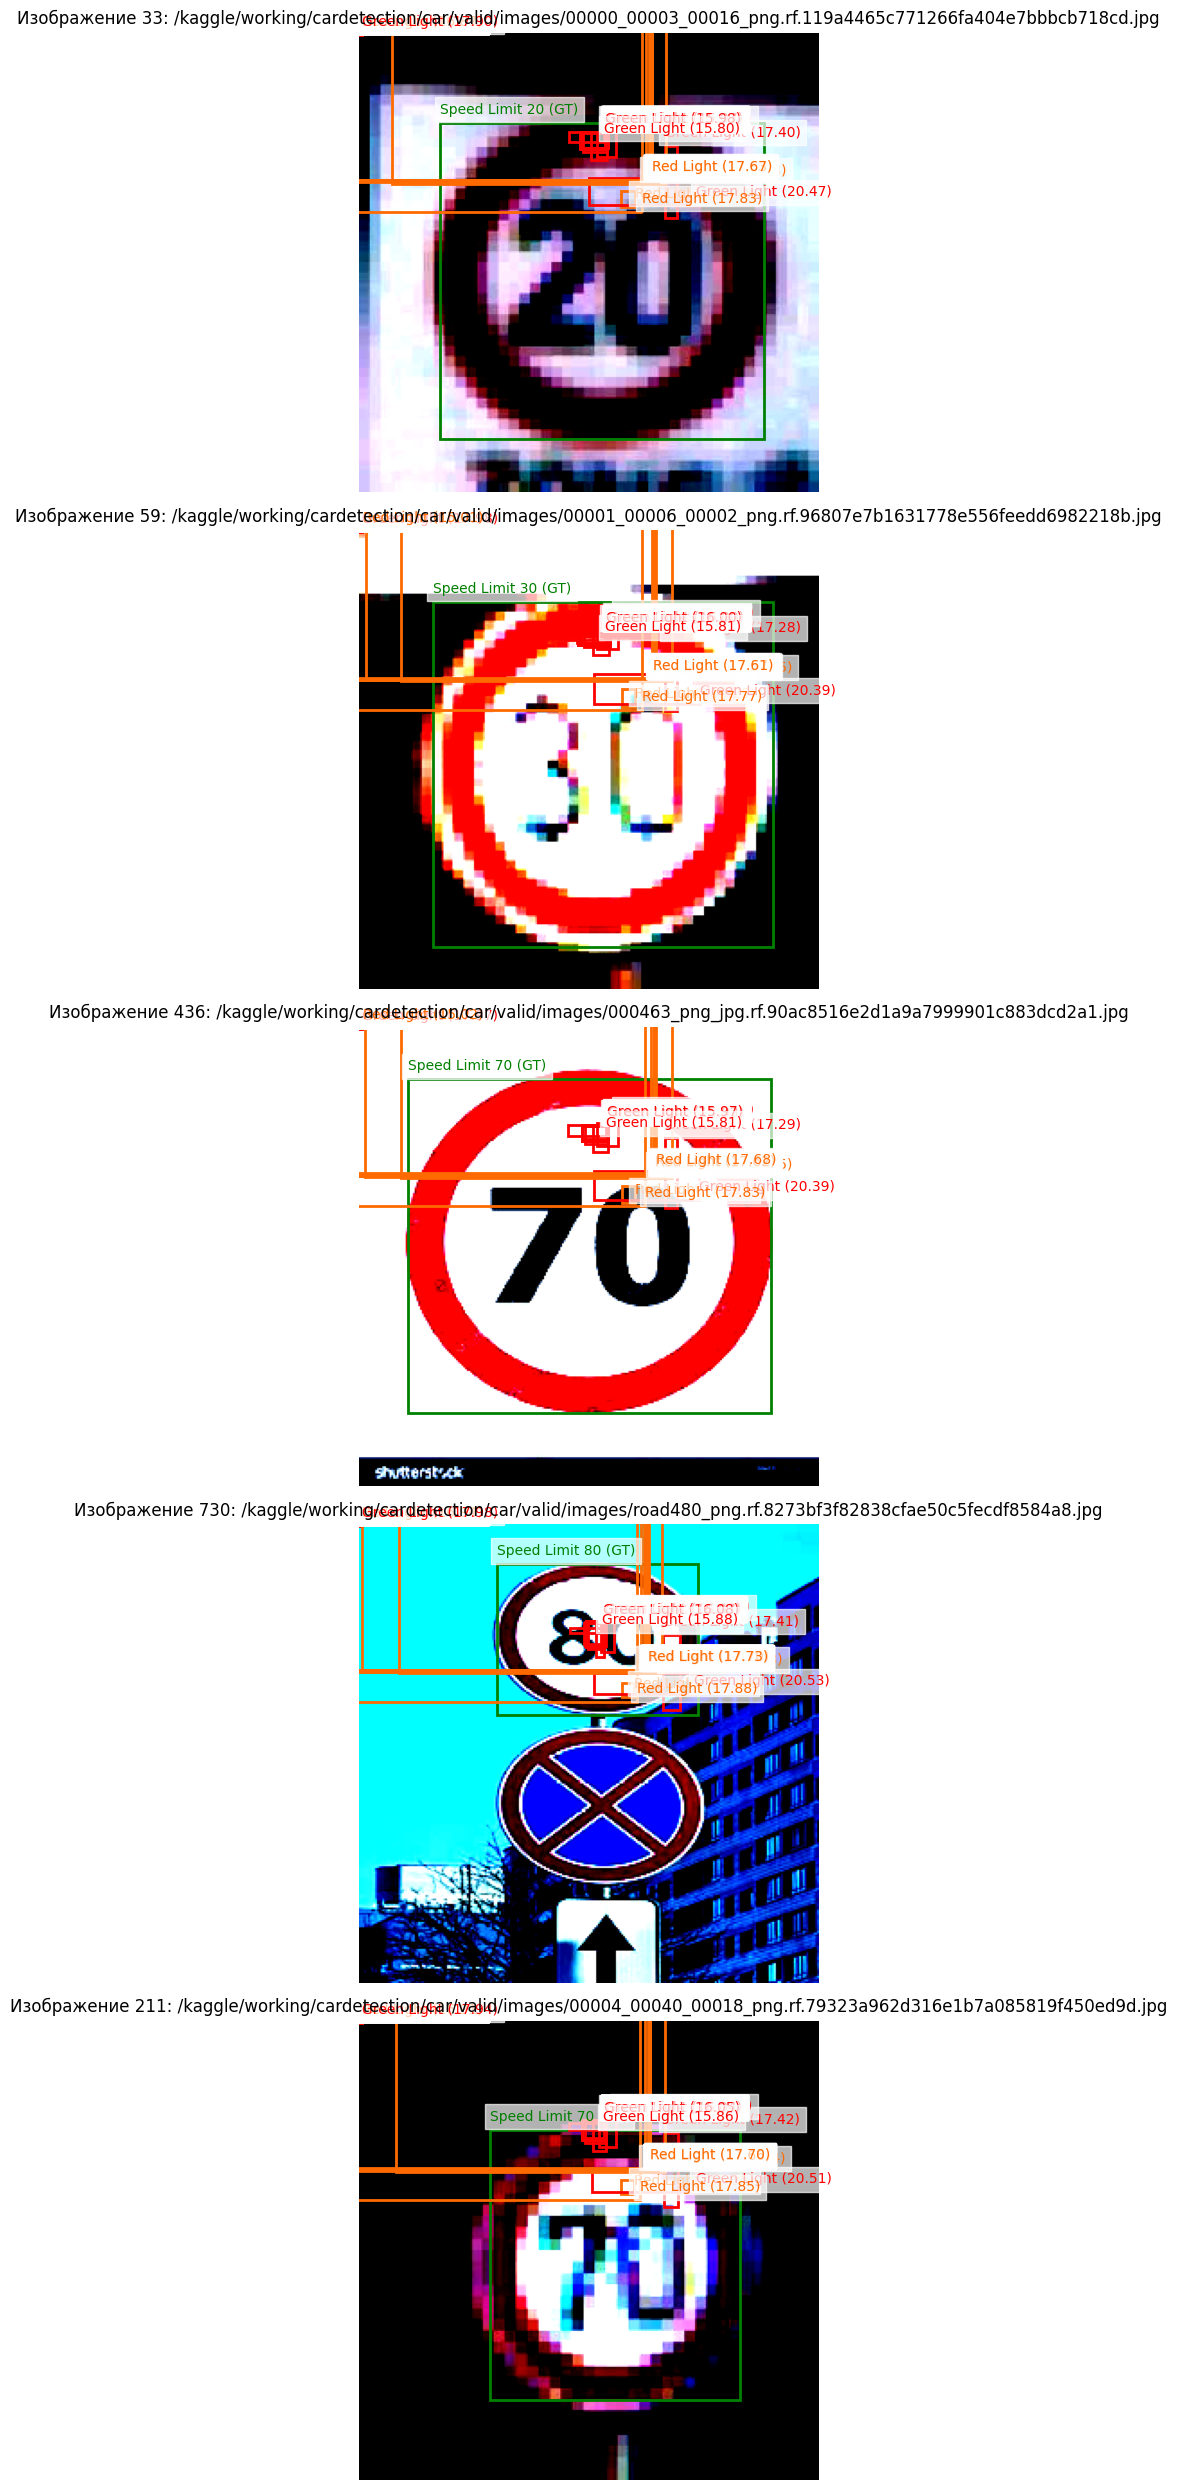

In [ ]:
visualize_detection(
    model=model,
    dataset=val_dataset,
    device=device,
    num_samples=5,
    conf_threshold=15,
)

Как мы видим собственная реализация детекции работает плохо по сравнению с пердобученной YOLO